<a href="https://colab.research.google.com/github/MarkovicMartin/GITCourse/blob/main/Practical_project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import roc_auc_score, classification_report

In [3]:
df1 =  pd.read_csv('/content/drive/MyDrive/ML-datasets/Practical project/df1.csv')

df2 =  pd.read_csv('/content/drive/MyDrive/ML-datasets/Practical project/df2.csv')

In [4]:
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [5]:
def des_object(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("*********************************")
    print("")
    
def des_numeric(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("***********")
    print(df[varname].describe())
    sns.histplot(df, x=varname, kde = True)
    plt.show()
    print("*********************************")
    print("")
    
def des_df(df):
    for c in df.columns:
        if df[c].dtype == object:
            des_object(df,c)
        else:
            des_numeric(df,c)
            

In [6]:
df2.isnull().sum().sort_values(ascending = False)

Attrition                   147
EmployeeNumber                0
TrainingTimesLastYear         0
YearsWithCurrManager          0
YearsSinceLastPromotion       0
YearsInCurrentRole            0
YearsAtCompany                0
WorkLifeBalance               0
TotalWorkingYears             0
Over18                        0
StockOptionLevel              0
StandardHours                 0
RelationshipSatisfaction      0
PerformanceRating             0
PercentSalaryHike             0
OverTime                      0
YearlyIncome                  0
dtype: int64

In [9]:
# Merge DF1/2 by Empoyee Number for training
df = pd.merge (df1, df2, on="EmployeeNumber")
df.shape

(4449, 36)

In [10]:
# column names and their data types
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [11]:
#unique values in columns
print(df.apply(lambda col: col.unique()))

EmployeeNumber              [104, 1638, 164, 395, 53, 1467, 727, 351, 555,...
Age                         [30.0, 38.0, 26.0, 28.0, 35.0, 34.0, 32.0, 42....
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [852.0, 397.0, 841.0, 1117.0, 464.0, 1107.0, 1...
Department                   [Research & Development, Human Resources, Sales]
DistanceFromHome            [1.0, 2.0, 6.0, 8.0, 4.0, 9.0, 3.0, 5.0, 22.0,...
Education                                           [1.0, 2.0, 3.0, 4.0, 5.0]
EducationField              [Life Sciences, Medical, Other, Technical Degr...
EmployeeCount                                                           [1.0]
EnvironmentSatisfaction                                  [4.0, 3.0, 1.0, 2.0]
Gender                                                         [Male, Female]
HourlyRate                  [55.0, 54.0, 46.0, 66.0, 75.0, 52.0, 39.0, 56....
JobInvolvement                                           [2.0, 3

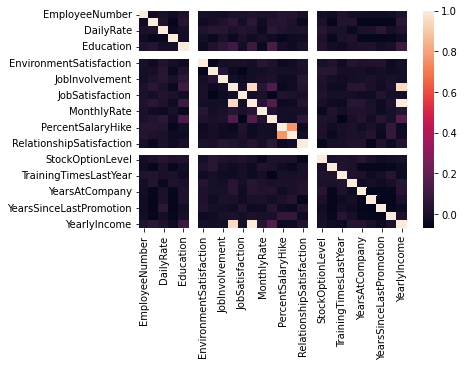

In [13]:
sns.heatmap(df.corr())

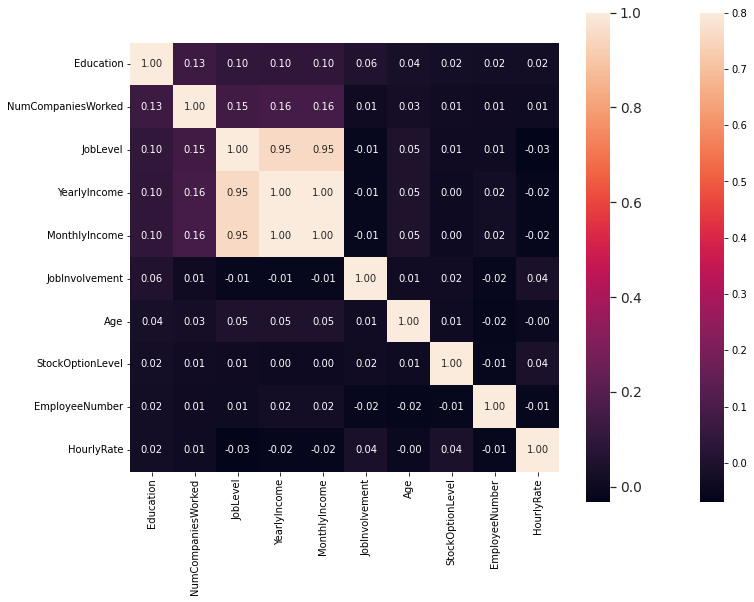

In [14]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Education')['Education'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##Drop over 18 and solving objects

In [15]:
df.drop(['Over18'], inplace=True, axis=1)
df.drop(['EmployeeCount'], inplace=True, axis=1)
df.drop(['StandardHours'], inplace=True, axis=1)
df.drop(['YearlyIncome'], inplace=True, axis=1)

In [16]:
df['OverTime'] = df['OverTime'].replace(['Yes','No'],[1,0])
df['Attrition'] = df['Attrition'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])



In [17]:
dummy = ['MaritalStatus','BusinessTravel', 'Department', 'EducationField', 'JobRole']
df = pd.get_dummies(df, columns=dummy, drop_first=True)


In [18]:
#data clearing - wrong values in: DistanceFromHome
for x in df.index:
  if df.loc[x, "DistanceFromHome"] > 29:
    df.loc[x, "DistanceFromHome"] = 30

In [19]:
for col in df.columns:
    print(col)

EmployeeNumber
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Attrition
MaritalStatus_Married
MaritalStatus_Single
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative


Outlaiers?


YearsWithCurrManager = YearsInCurrentRole
DONE

YearsInCurrentRole = YearsAtCompany - YearsSinceLastPromotion
DONE

YearsSinceLastPromotion = YearsAtCompany - YearsInCurrentRole
DONE

YearsAtCompany = YearsInCurrentRole + YearsSinceLastPromotion 
DONE


TotalWorkingYears = Age - Education
DONE

Age = Education + TotalWorkingYears
DONE 

1 'Below College' = 18

2 'College' = 19

3 'Bachelor' = 22

4 'Master' = 24

5 'Doctor' = 27

#Age = Education + TotalWorkingYears

In [20]:
for x in df.index:
  if df.loc[x, "Age"] > 60:
    if df.loc[x, "Education"] == 1:
      df.loc[x, "Age"] = 18 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 2:
      df.loc[x, "Age"] = 19 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 3:
      df.loc[x, "Age"] = 22 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 4:
      df.loc[x, "Age"] = 24 + df.loc[x, "TotalWorkingYears"]
    else:
      df.loc[x, "Age"] = 27 + df.loc[x, "TotalWorkingYears"]
      

#TotalWorkingYears = Age - Education

In [21]:
for x in df.index:
  if df.loc[x, "TotalWorkingYears"] > 40:
    if df.loc[x, "Education"] == 1:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 18 
    elif df.loc[x, "Education"] == 2:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 19
    elif df.loc[x, "Education"] == 3:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 22
    elif df.loc[x, "Education"] == 4:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 24
    else:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 27 

In [22]:
#Solving 4 values of -4 by putting 0 instead. They dont have Age to have this kind of degree - different country Age at schools most likely we have no idea of country datas are from
for x in df.index:
  if df.loc[x, "TotalWorkingYears"] == -4:
    df.loc[x, "TotalWorkingYears"] = 0

#YearsAtCompany = YearsInCurrentRole + YearsSinceLastPromotion

In [23]:
for x in df.index:
  if df.loc[x, "YearsAtCompany"] > 40:
    df.loc[x, "YearsAtCompany"] = df.loc[x, "YearsInCurrentRole"] + df.loc[x, "YearsSinceLastPromotion"]


#YearsSinceLastPromotion = YearsAtCompany - YearsInCurrentRole

In [24]:
for x in df.index:
  if df.loc[x, "YearsSinceLastPromotion"] > 40:
    df.loc[x, "YearsSinceLastPromotion"] = df.loc[x, "YearsAtCompany"] - df.loc[x, "YearsInCurrentRole"]

#YearsInCurrentRole = YearsAtCompany - YearsSinceLastPromotion

In [25]:
for x in df.index:
  if df.loc[x, "YearsInCurrentRole"] > 40:
    df.loc[x, "YearsInCurrentRole"] = df.loc[x, "YearsAtCompany"] - df.loc[x, "YearsSinceLastPromotion"]


#YearsWithCurrManager = YearsInCurrentRole

In [26]:
for x in df.index:
  if df.loc[x, "YearsWithCurrManager"] > 40:
    df.loc[x, "YearsWithCurrManager"] = df.loc[x, "YearsInCurrentRole"]

#**Data Train**

Splitting

In [52]:
df_test = df[df['EmployeeNumber'] >= 100000]
df_train = df[df['EmployeeNumber'] < 100000]


In [59]:
X = df_train.drop(['Attrition'], axis=1)
y = df_train['Attrition']


X_df_test = df_test.drop(['Attrition'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
X.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,104,30.0,852.0,1.0,1.0,4.0,1,55.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,1638,38.0,397.0,2.0,2.0,4.0,0,54.0,2.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,164,26.0,841.0,6.0,3.0,3.0,0,46.0,2.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,395,28.0,1117.0,8.0,2.0,4.0,0,66.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,53,35.0,464.0,4.0,2.0,3.0,1,75.0,3.0,1.0,...,1,0,0,1,0,0,0,0,0,0


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

models = [
    LogisticRegression(max_iter=3000),
    #RandomForestClassifier(), # n_estimators=100, max_depth=5, random_state=42
    #SVC(probability=True),
    #KNeighborsClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    #XGBClassifier(),
    #LGBMClassifier()
    ]

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Train and score algorithms
for m in models:
    
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    auc = roc_auc_score(y_test, pred)
    cv = cross_val_score(m, X_test, y_test, cv=5).mean() 
    print(m.__class__.__name__)
    #print('AUC-ROC score: ', auc)
    print('AUC-ROC score (cv=5): ', cv)
    print("-----------------------")



LogisticRegression
AUC-ROC score (cv=5):  0.7098591549295775
-----------------------


In [111]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.571513
         Iterations 5
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.175      
Dependent Variable:      Attrition             AIC:                   3332.2014  
Date:                    2022-10-17 17:15      BIC:                   3445.5600  
No. Observations:        2882                  Log-Likelihood:        -1647.1    
Df Model:                18                    LL-Null:               -1995.4    
Df Residuals:            2863                  LLR p-value:           3.0052e-136
Converged:               1.0000                Scale:                 1.0000     
No. Iterations:          5.0000                                                  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [109]:
#drop collums with low impact
'''
df.drop(['JobRole_Sales Representative'], inplace=True, axis=1)
df.drop(['JobRole_Sales Executive'], inplace=True, axis=1)
df.drop(['JobRole_Research Scientist'], inplace=True, axis=1)
df.drop(['JobRole_Manager'], inplace=True, axis=1)
df.drop(['JobRole_Laboratory Technician'], inplace=True, axis=1)
df.drop(['BusinessTravel_Travel_Rarely'], inplace=True, axis=1)
df.drop(['YearsInCurrentRole'], inplace=True, axis=1)
df.drop(['BusinessTravel_Travel_Frequently'], inplace=True, axis=1)
df.drop(['MaritalStatus_Single'], inplace=True, axis=1)
df.drop(['DistanceFromHome'], inplace=True, axis=1)
df.drop(['Education'], inplace=True, axis=1)
df.drop(['RelationshipSatisfaction'], inplace=True, axis=1)
df.drop(['JobLevel'], inplace=True, axis=1)
df.drop(['MonthlyIncome'], inplace=True, axis=1)
df.drop(['PercentSalaryHike'], inplace=True, axis=1)
df.drop(['Gender'], inplace=True, axis=1)
df.drop(['MonthlyRate'], inplace=True, axis=1)
df.drop(['NumCompaniesWorked'], inplace=True, axis=1)
df.drop(['TotalWorkingYears'], inplace=True, axis=1)
df.drop(['TrainingTimesLastYear'], inplace=True, axis=1)
df.drop(['YearsAtCompany'], inplace=True, axis=1)
df.drop(['YearsSinceLastPromotion'], inplace=True, axis=1)
df.drop(['YearsWithCurrManager'], inplace=True, axis=1)
df.drop(['MaritalStatus_Married'], inplace=True, axis=1)
df.drop(['JobRole_Research Director'], inplace=True, axis=1)

'''
df.drop(['HourlyRate'], inplace=True, axis=1)


df_test = df[df['EmployeeNumber'] >= 100000]
df_train = df[df['EmployeeNumber'] < 100000]

X = df_train.drop(['Attrition'], axis=1)
y = df_train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#output

In [112]:
#best model LogisticRegression()

X_df_test = df_test.drop(['Attrition'], axis=1)


m=LogisticRegression()  
  
m.fit(X_train, y_train)
pred = m.predict(X_df_test)
X_df_test['pred']=pred
print(m.__class__.__name__)
print('AUC-ROC score (cv=5): ', cv)
print("-----------------------")


LogisticRegression
AUC-ROC score (cv=5):  0.7098591549295775
-----------------------


In [113]:
vystup = pd.DataFrame()
vystup['EmployeeNumber'] = X_df_test['EmployeeNumber'] 
vystup['pred'] = X_df_test['pred']
vystup


,EmployeeNumber,pred
1323,100000,1.0
1324,100001,1.0
1325,100002,1.0
1326,100003,1.0
1327,100004,1.0
...,...,...
1465,100142,1.0
1466,100143,1.0
1467,100144,1.0
1468,100145,1.0


In [114]:
vystup.to_csv("Submission.csv", index = False)